In [2]:
import pandas
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
df = pandas.read_csv("D:\ArunKumar\Library\Machine Learning\Project_SelfHealing\DataSet_14L_1.5P.csv")
X = df[['Load','Capsule','InitialFrequency','Days']]
y = df['Frequency']

In [ ]:
#TrainingSet
X_test = [[14,1.5,106.2,5]]

In [4]:
#Training Set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
print(X_test)
print(y_test)

    Load  Capsule  InitialFrequency  Days
3     14      0.0             107.1    14
16    14      6.0             108.2     3
6     14      1.5             106.2    10
10    12      3.0             107.4    10
2     14      0.0             107.1    10
3     234.8
16    236.2
6     211.2
10    205.3
2     235.1
Name: Frequency, dtype: float64


In [5]:
#Multiple linear Regression
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

#Coefficient
#print(regr.coef_)

[218.50634943 225.96975643 211.06961102 204.34571688 231.51250327]


In [7]:
#BRR : Bayesian Ridge Regression : Very effective when the size of the dataset is small.
from sklearn.linear_model import BayesianRidge

# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = model.predict(X_test)
print(y_pred)

[201.5274539  223.01930196 210.44654739 203.15610531 215.96389318]


In [8]:
#GBR : Gradient Boosting Regression - WORKS ACCURATE
from sklearn.ensemble import GradientBoostingRegressor

# with new parameters
model = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)
# with default parameters
model = GradientBoostingRegressor()

model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

[234.77951224 236.25870737 211.0462019  205.42113882 235.1439454 ]


In [9]:
#Ridge Regression : Ridge regression is a method we can use to fit a regression model when multicollinearity is present in the data.
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold


#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define Ridge model
#model = Ridge(alpha = 0.5, tol = 0.001, solver ='auto', random_state = 42)
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print("Alpha : ",model.alpha_)

#predict hp value using ridge regression model
y_pred = model.predict(X_test)
print(y_pred)

Alpha :  0.99
[216.92209365 224.99016475 212.536707   204.41849894 229.88874907]


In [10]:
#Lasso Ridge Regression
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define LassoCV model
model = LassoCV(alphas=arange(0.1, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X, y)

#predict hp value using ridge regression model
y_pred = model.predict(X_test)
print(y_pred)

[216.8485032  224.76812602 212.36354577 204.83000424 229.75373397]


In [12]:
# Standard Scaler
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(X)
#print(scaledX)

model = linear_model.LinearRegression()
model.fit(scaledX, y)

scaled = scale.transform(X_test)
y_pred = model.predict(scaled)
print(y_pred)

[218.50634943 225.96975643 211.06961102 204.34571688 231.51250327]


In [13]:
#DTR : Decision Tree Regression
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=5)
model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

[234.8 236.2 211.2 205.3 235.1]


In [14]:
#Support Vector Regression
from sklearn import svm
model = svm.SVR()
model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

[214.12962424 214.24718016 214.17601947 214.16607815 214.18291278]


In [17]:
# LinearSVR - Support Vector Regression

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

model = make_pipeline(LinearSVR(random_state=0, tol=1e-5))
model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

[211.24108398 225.0615191  216.01629558 208.15976852 223.1008525 ]


C:\Users\Arun Kumar\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
# ANN - Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

model = MLPRegressor(max_iter=500)
model.fit(X, y)

y_pred = model.predict(X_test)
print(y_pred)

[211.02754209 222.228105   214.09135207 208.06280302 218.93110711]


C:\Users\Arun Kumar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# Evaluation of r2 score of the model against the test set
from sklearn.metrics import r2_score
print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")

r2 Score Of Test Set : -0.15196643666823695


In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)

MSE: 207.55


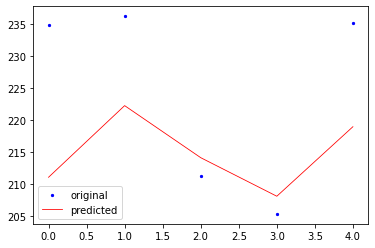

In [18]:
# Original Vs Predicted Values
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

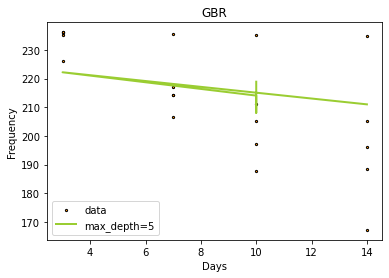

In [20]:
# Plot the results

plt.figure()
plt.scatter(X['Days'], y, s=5, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test['Days'], y_pred, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("GBR")
plt.legend()
plt.show()

In [ ]:
# Implementation of gradient descent in linear regression 
import numpy as np 
import matplotlib.pyplot as plt 
  
class Linear_Regression: 
    def __init__(self, X, Y): 
        self.X = X 
        self.Y = Y 
        self.b = [0, 0] 
      
    def update_coeffs(self, learning_rate): 
        Y_pred = self.predict() 
        Y = self.Y 
        m = len(Y) 
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                np.sum(Y_pred - Y))) 
  
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                np.sum((Y_pred - Y) * self.X))) 
  
    def predict(self, X=[]): 
        Y_pred = np.array([]) 
        if not X: X = self.X 
        b = self.b 
        for x in X: 
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x)) 
  
        return Y_pred 
      
    def get_current_accuracy(self, Y_pred): 
        p, e = Y_pred, self.Y 
        n = len(Y_pred) 
        return 1-sum( 
            [ 
                abs(p[i]-e[i])/e[i] 
                for i in range(n) 
                if e[i] != 0] 
        )/n 
    #def predict(self, b, yi): 
  
    def compute_cost(self, Y_pred): 
        m = len(self.Y) 
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2) 
        return J 
  
    def plot_best_fit(self, Y_pred, fig): 
                f = plt.figure(fig) 
                plt.scatter(self.X, self.Y, color='b') 
                plt.plot(self.X, Y_pred, color='g') 
                f.show() 
  
  
def main(): 
    X = np.array([i for i in range(11)]) 
    Y = np.array([2*i for i in range(11)]) 
  
    regressor = Linear_Regression(X, Y) 
  
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = [] 
      
    #original best-fit line 
    Y_pred = regressor.predict() 
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line') 
      
  
    while 1: 
        Y_pred = regressor.predict() 
        cost = regressor.compute_cost(Y_pred) 
        costs.append(cost) 
        regressor.update_coeffs(learning_rate) 
          
        iterations += 1
        if iterations % steps == 0: 
            print(iterations, "epochs elapsed") 
            print("Current accuracy is :", 
                regressor.get_current_accuracy(Y_pred)) 
  
            stop = input("Do you want to stop (y/*)??") 
            if stop == "y": 
                break
  
    #final best-fit line 
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line') 
  
    #plot to verify cost function decreases 
    h = plt.figure('Verification') 
    plt.plot(range(iterations), costs, color='b') 
    h.show() 
  
    # if user wants to predict using the regressor: 
    regressor.predict([i for i in range(10)]) 
  
if __name__ == '__main__': 
    main()

In [14]:
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None,feature_names=['Load','Capsule','InitialFrequency','Days'], class_names=['Frequency'])

import pydotplus
import graphviz
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data) # Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found